Скачиваем датасет с отзывами на фильмы

In [1]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

--2024-02-09 20:57:10--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  5.42MB/s    in 0.6s    

2024-02-09 20:57:12 (5.42 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]



Разархивируем датасет

In [2]:
!tar -xvf review_polarity.tar.gz

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv013_10494.txt
txt_sentoken/neg/cv014_15600.txt
txt_sentoken/neg/cv015_29356.txt
txt_sentoken/neg/cv016_4348.txt
txt_sentoken/neg/cv017_23487.txt
txt_sentoken/neg/cv018_21672.txt
txt_sentoken/neg/cv019_16117.txt
txt_sentoken/neg/cv020_9234.txt
txt_sentoken/neg/cv021_17313.txt
txt_sentoken/neg/cv022_14227.txt
txt_sentoken/neg/cv023_13847.txt
txt_sentoken/neg/cv024_7033.txt
txt_sentoken/neg/cv025_29825.txt
txt_sentoken/neg/cv026_29229.txt
txt_sentoken/neg/cv027_26270.txt
txt_sentoken/neg/cv028_26964.txt
txt_sentoken/neg/cv029_19943.txt
txt_sentoken/n

Подгружаем модуль для загрузки датасете и загружаем его

In [3]:
import sklearn
from sklearn.datasets import load_files

In [4]:
datadir="txt_sentoken"
movie_review_data=load_files(datadir,shuffle=True)

In [5]:
type(movie_review_data)

sklearn.utils._bunch.Bunch

In [6]:
movie_review_data.target

array([0, 1, 1, ..., 1, 0, 0])

In [7]:
movie_review_data.target_names

['neg', 'pos']

Конвертируем загруженный датасет в формат датафрейма pandas

In [8]:
import pandas as pd
df = pd.DataFrame(data=movie_review_data.data)
df["target"] = movie_review_data.target

In [9]:
df.head()

,0,target
0,"b""arnold schwarzenegger has been an icon for a...",0
1,"b""good films are hard to find these days . \ng...",1
2,"b""quaid stars as a man who has taken up the pr...",1
3,b'we could paraphrase michelle pfieffer\'s cha...,0
4,"b""kolya is one of the richest films i've seen ...",1


In [10]:
df["target"].value_counts()

0    1000
1    1000
Name: target, dtype: int64

Визуализируем в виде пайчарта распределение классов в датасете

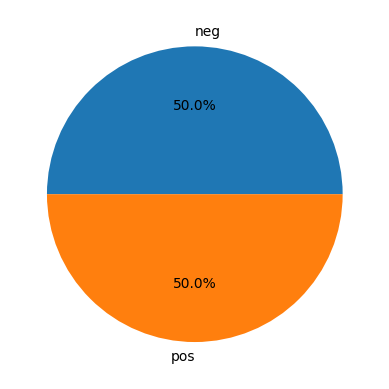

In [11]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=movie_review_data.target_names, autopct='%1.1f%%')
plt.show()

In [12]:
lenght = len(df[0][0])
print(f'Length of a sample review: {lenght}')

Length of a sample review: 3126


In [13]:
df = df.rename(columns={0: 'Review'})

In [14]:
df['Length'] = df['Review'].str.len()
df.head(10)

,Review,target,Length
0,"b""arnold schwarzenegger has been an icon for a...",0,3126
1,"b""good films are hard to find these days . \ng...",1,3291
2,"b""quaid stars as a man who has taken up the pr...",1,1732
3,b'we could paraphrase michelle pfieffer\'s cha...,0,2177
4,"b""kolya is one of the richest films i've seen ...",1,727
5,b'i don\'t know how many other people have had...,1,4289
6,"b'capsule : trippy , hyperspeed action machine...",1,2587
7,b'gothic murder-mystery yarns are not a new co...,1,5584
8,"b""what i look for in a movie is not necessaril...",1,2734
9,b'the law of crowd pleasing romantic movies st...,0,2487


In [15]:
df['Length'].mean()

3893.002

In [16]:
def parseword(text):
  text_word = text.split()
  return text_word

In [17]:
df['Review_words'] = df['Review'].apply(parseword)
df.head(10)

,Review,target,Length,Review_words
0,"b""arnold schwarzenegger has been an icon for a...",0,3126,"[b'arnold', b'schwarzenegger', b'has', b'been'..."
1,"b""good films are hard to find these days . \ng...",1,3291,"[b'good', b'films', b'are', b'hard', b'to', b'..."
2,"b""quaid stars as a man who has taken up the pr...",1,1732,"[b'quaid', b'stars', b'as', b'a', b'man', b'wh..."
3,b'we could paraphrase michelle pfieffer\'s cha...,0,2177,"[b'we', b'could', b'paraphrase', b'michelle', ..."
4,"b""kolya is one of the richest films i've seen ...",1,727,"[b'kolya', b'is', b'one', b'of', b'the', b'ric..."
5,b'i don\'t know how many other people have had...,1,4289,"[b'i', b""don't"", b'know', b'how', b'many', b'o..."
6,"b'capsule : trippy , hyperspeed action machine...",1,2587,"[b'capsule', b':', b'trippy', b',', b'hyperspe..."
7,b'gothic murder-mystery yarns are not a new co...,1,5584,"[b'gothic', b'murder-mystery', b'yarns', b'are..."
8,"b""what i look for in a movie is not necessaril...",1,2734,"[b'what', b'i', b'look', b'for', b'in', b'a', ..."
9,b'the law of crowd pleasing romantic movies st...,0,2487,"[b'the', b'law', b'of', b'crowd', b'pleasing',..."


Удаляем стоп-слова из датасета и помещаем в столбец Review_words, затем разделяем на отдельные слова и помещаем в Review_words_cleaned

In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
def clean(review):
  review = review.decode().lower()
  review = re.sub('[^a-z A-Z 0-9-]+', '', review)
  review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

  return review

In [20]:
df['Review_words'] = df['Review'].apply(clean)
df.head(10)

,Review,target,Length,Review_words
0,"b""arnold schwarzenegger has been an icon for a...",0,3126,arnold schwarzenegger icon action enthusiasts ...
1,"b""good films are hard to find these days . \ng...",1,3291,good films hard find days great films beyond r...
2,"b""quaid stars as a man who has taken up the pr...",1,1732,quaid stars man taken proffesion dragonslayer ...
3,b'we could paraphrase michelle pfieffer\'s cha...,0,2177,could paraphrase michelle pfieffers character ...
4,"b""kolya is one of the richest films i've seen ...",1,727,kolya one richest films ive seen time zdenek s...
5,b'i don\'t know how many other people have had...,1,4289,dont know many people idea cross mind life cou...
6,"b'capsule : trippy , hyperspeed action machine...",1,2587,capsule trippy hyperspeed action machine hong ...
7,b'gothic murder-mystery yarns are not a new co...,1,5584,gothic murder-mystery yarns new conceit fact t...
8,"b""what i look for in a movie is not necessaril...",1,2734,look movie necessarily perfection sometimes mo...
9,b'the law of crowd pleasing romantic movies st...,0,2487,law crowd pleasing romantic movies states two ...


In [21]:
df['Review_words_cleaned'] = df['Review_words'].apply(parseword)
df.head(10)

,Review,target,Length,Review_words,Review_words_cleaned
0,"b""arnold schwarzenegger has been an icon for a...",0,3126,arnold schwarzenegger icon action enthusiasts ...,"[arnold, schwarzenegger, icon, action, enthusi..."
1,"b""good films are hard to find these days . \ng...",1,3291,good films hard find days great films beyond r...,"[good, films, hard, find, days, great, films, ..."
2,"b""quaid stars as a man who has taken up the pr...",1,1732,quaid stars man taken proffesion dragonslayer ...,"[quaid, stars, man, taken, proffesion, dragons..."
3,b'we could paraphrase michelle pfieffer\'s cha...,0,2177,could paraphrase michelle pfieffers character ...,"[could, paraphrase, michelle, pfieffers, chara..."
4,"b""kolya is one of the richest films i've seen ...",1,727,kolya one richest films ive seen time zdenek s...,"[kolya, one, richest, films, ive, seen, time, ..."
5,b'i don\'t know how many other people have had...,1,4289,dont know many people idea cross mind life cou...,"[dont, know, many, people, idea, cross, mind, ..."
6,"b'capsule : trippy , hyperspeed action machine...",1,2587,capsule trippy hyperspeed action machine hong ...,"[capsule, trippy, hyperspeed, action, machine,..."
7,b'gothic murder-mystery yarns are not a new co...,1,5584,gothic murder-mystery yarns new conceit fact t...,"[gothic, murder-mystery, yarns, new, conceit, ..."
8,"b""what i look for in a movie is not necessaril...",1,2734,look movie necessarily perfection sometimes mo...,"[look, movie, necessarily, perfection, sometim..."
9,b'the law of crowd pleasing romantic movies st...,0,2487,law crowd pleasing romantic movies states two ...,"[law, crowd, pleasing, romantic, movies, state..."


In [22]:
allwords=[]
for i in range(df.shape[0]):
  allwords+= df['Review_words_cleaned'][i]

In [23]:
allwords[331]

'consider'

In [24]:
from collections import Counter

In [25]:
mostFreq = Counter(allwords).most_common(10)
mostFreq

[('film', 8853),
 ('one', 5518),
 ('movie', 5436),
 ('like', 3545),
 ('even', 2554),
 ('good', 2318),
 ('time', 2281),
 ('story', 2117),
 ('films', 2103),
 ('would', 2042)]

In [26]:
words = []
freq = []
for word, count in mostFreq:
    words.append(word)
    freq.append(count)

In [27]:
import seaborn as sns
sns.set_style('darkgrid')

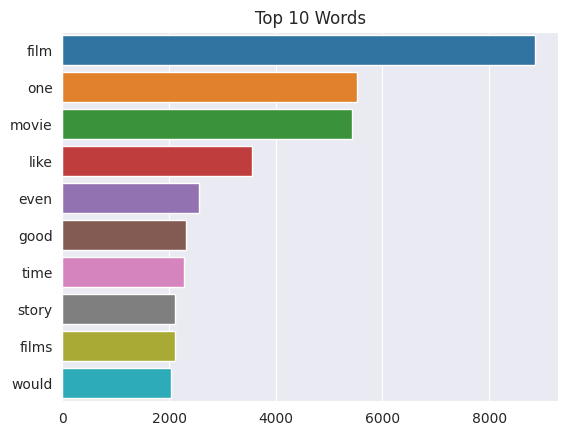

In [28]:
sns.barplot(x=freq, y=words, hue=words)
plt.title('Top 10 Words')
plt.show()

Используем CountVectorizer для применения подхода bag of words. Преобразование текстового представления в вектора чисел

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
cv = CountVectorizer()
vector = cv.fit_transform(df['Review_words'])

In [31]:
vv = cv.transform(["it is true and true"])
print(vv)

  (0, 1720)	1
  (0, 19490)	1
  (0, 19540)	1
  (0, 38376)	2


In [32]:
cv.vocabulary_['true']

38376

Для предварительного разведочного анализа данных были рассмотренны следующие характеристики: число примеров каждого класса, длина каждого примера текста, средняя длина примера, частота встречаемости слов.
Реализована визуализация распределения данных по классам и статистика 10-ти наиболее встречающихся слов.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
y = df['target']
X = vector.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

In [35]:
from sklearn.dummy import DummyClassifier

In [36]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Для оценки качества были выбраны метрики - точность, полнота и f1. Они позволяют оценить работу с данными с разных сторон, наиболее информативно - f1. Точность показывает насколько мало ошибок дает модель на тех объектах, которые она выбрала, полнота - сколько она правильно нашла объектов из всех существующих объектов этого класса, а f1 совмещает в себе две эти метрики.

In [38]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [39]:
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.472

In [40]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.832

In [41]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')

Precision for Dummy Classificator: 0.472


In [42]:
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')

Precision for Logistic regression: 0.8114754098360656


In [43]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')

Recall for Dummy Classificator: 1.0


In [44]:
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Recall for Logistic regression: 0.8389830508474576


In [45]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')

F1-score for Dummy Classificator: 0.6413043478260869


In [46]:
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1-score for Logistic regression: 0.825


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
def plot_roc_auc(fpr, tpr, thresholds, title):
  plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
  plt.plot(fpr, tpr, marker='.', label='Logistic')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.grid()
  plt.show()

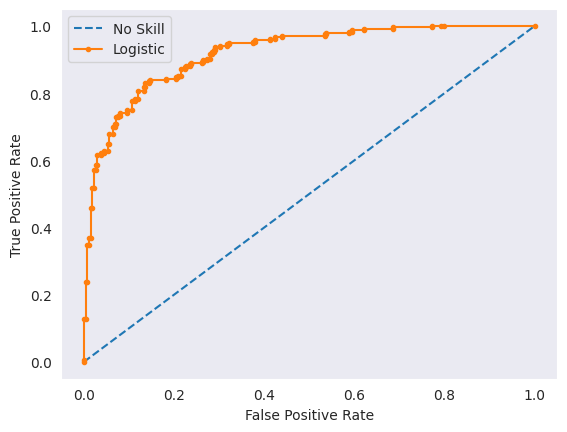

In [49]:
y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_auc(fpr, tpr, thresholds, title='Logistic regression')